In [64]:
from model.model import *
from model.neural_network_model import *
from processing.data_processing import *
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',2000)
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [53]:
dataframes = load_data("../data/")
cleaned_data = pd.concat([FeatureEngineeringStatsBefore().fit_transform(data) for data in dataframes], axis=0)

x_train, y_train, x_test, y_test = split_dataset(cleaned_data, 0.3, "FTR")

In [54]:
transformers = [SelectBasicFeatures(["B365H", "B365D", "B365A"]),
                GetMonthYear()]

feature_engineering = MergeTransformers(transformers)

pipeline = Pipeline([("feature_engineering", feature_engineering),
                     ("model", RandomForestClassifier(n_estimators=100))])
pipeline.fit(x_train, y_train)
error = evaluate_model(pipeline, "Random Forest", pipeline.predict(x_test), y_test)

Logistic Regression
             precision    recall  f1-score   support

          A       0.51      0.45      0.48       119
          D       0.31      0.25      0.28       105
          H       0.55      0.65      0.59       181

avg / total       0.48      0.49      0.48       405



In [55]:
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, 
    x_train, 
    y_train,
    cv=10,
    scoring="accuracy",
    train_sizes=np.linspace(0.1,1,50))

In [56]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [57]:
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [58]:
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="CV score")

In [59]:
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

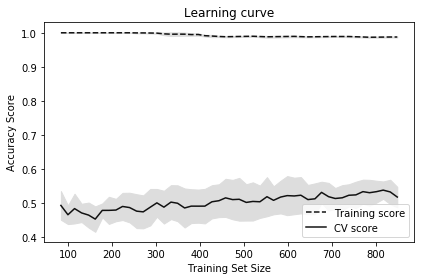

In [60]:
plt.title("Learning curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()